In [1]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
def generate_ancestors(t=10, sigma=20):
    ancestors = []
    time = 0
    while time <= t:
        x = np.random.exponential(1/sigma)
        ancestors.append(time)
        time += x


    return ancestors

In [4]:
def h(n, _lambda=0.1, _type='uni'):
    if _type == 'uni':
        return np.random.uniform(0, 20, size=n)  # uniform [0, 20]
    if _type == 'exp':
        # return stats.expon.rvs(scale=1/_lambda, size=n)  # lambda*exp{-lambda*t}
        return np.random.exponential(1/_lambda, size=n)

In [5]:
def generate_taus(n, t, _lambda=0.1, _type='uni'):
    taus = []
    for i in range(n):
        taus.append(h(t, _lambda=_lambda, _type=_type))

    return taus

In [6]:
class Simulator:
    def __init__(self, n_runs, n_gen, h_type='uni'):
        self.n_runs = n_runs
        self.n_gen = n_gen

        self.m = 2
        self.h_type = h_type
        self.death_prob = 0.02

    def run_experiment(self, _type):
        ancestors = generate_ancestors()
        l = [ancestors]
        deaths = []
        infected = []

        for i in range(self.n_gen):
            print(f"gen: {i}, nodes: {len(l[i])}")
            death = np.random.random(size=len(l[i]))
            death = death[death < self.death_prob]
            deaths.append(len(death))

            nodes_i = []
            for parents_time in l[i]:
                infected.append(parents_time)

                n = stats.poisson.rvs(self.m)  # generate children

                # taus = generate_taus(n, parents_time, _type=_type)
                taus = h(n, _type=_type)
                t_w = np.array(taus) + parents_time

                # not add childs above time threshold

                nodes_i.extend(t_w[t_w < self.n_gen])

            l.append(nodes_i)
            if len(nodes_i) == 0:  # exit if process is extinct
                break


        return l, infected, deaths

    def plot(self):
        pass

    def simulate(self, n_runs=1):

        res_uni = self.run_experiment(_type='uni')
        res_exp = self.run_experiment(_type='exp')

        return res_uni, res_exp

In [17]:
s = Simulator(1, 100)

In [18]:
res_uni, res_exp = s.simulate()

gen: 0, nodes: 181
gen: 1, nodes: 357
gen: 2, nodes: 683
gen: 3, nodes: 1403
gen: 4, nodes: 2735
gen: 5, nodes: 5421
gen: 6, nodes: 10737
gen: 7, nodes: 20554
gen: 8, nodes: 35791
gen: 9, nodes: 54107
gen: 10, nodes: 69991
gen: 11, nodes: 78014
gen: 12, nodes: 75947
gen: 13, nodes: 66154
gen: 14, nodes: 52178
gen: 15, nodes: 37419
gen: 16, nodes: 25176
gen: 17, nodes: 15809
gen: 18, nodes: 9352
gen: 19, nodes: 5298
gen: 20, nodes: 2692
gen: 21, nodes: 1275
gen: 22, nodes: 553
gen: 23, nodes: 249
gen: 24, nodes: 113
gen: 25, nodes: 57
gen: 26, nodes: 38
gen: 27, nodes: 9
gen: 28, nodes: 1
gen: 0, nodes: 220
gen: 1, nodes: 396
gen: 2, nodes: 754
gen: 3, nodes: 1504
gen: 4, nodes: 2971
gen: 5, nodes: 5688
gen: 6, nodes: 10658
gen: 7, nodes: 19423
gen: 8, nodes: 33791
gen: 9, nodes: 55693
gen: 10, nodes: 86941
gen: 11, nodes: 128566
gen: 12, nodes: 179786
gen: 13, nodes: 237401
gen: 14, nodes: 295555
gen: 15, nodes: 348116
gen: 16, nodes: 387936
gen: 17, nodes: 411737
gen: 18, nodes: 41655

In [19]:
print(len(res_uni[0]))
print(len(res_exp[0]))

30
45


In [20]:
print(np.sum(res_uni[2]))
print(np.sum(res_exp[2]))

11545
97234


In [21]:
print(len(res_uni[1]))
print(len(res_exp[1]))

572294
4880718


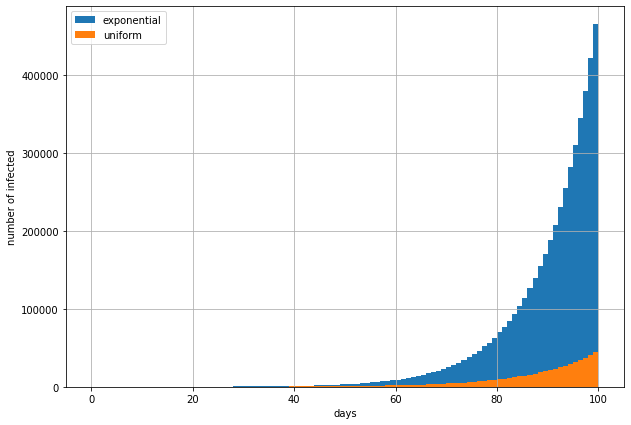

In [29]:
plt.figure(figsize=(10,7))

plt.hist(res_exp[1], bins=100, label='exponential')
plt.hist(res_uni[1], bins=100, label='uniform')

plt.xlabel("days", fontsize=14)
plt.ylabel("number of infected", fontsize=14)
plt.grid()
plt.legend()
plt.savefig("infected_hist.png")
plt.show()

In [23]:
l_u, arr2_u = np.histogram(res_uni[1], bins=100)
arr1_u = [0]
arr1_u.extend(l_u)

l_e, arr2_e = np.histogram(res_exp[1], bins=100)
arr1_e = [0]
arr1_e.extend(l_e)

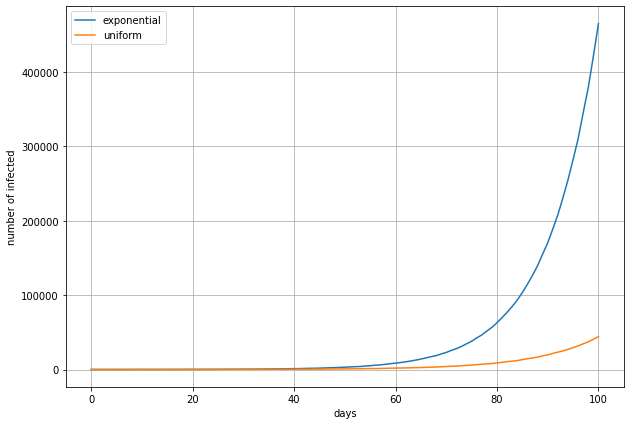

In [31]:
plt.figure(figsize=(10,7))

plt.plot(arr2_e, arr1_e, label="exponential")
plt.plot(arr2_u, arr1_u, label="uniform")

plt.legend()
plt.grid()
plt.xlabel("days", fontsize=14)
plt.ylabel("number of infected", fontsize=14)
plt.savefig("infected_plot.png")
plt.show()

In [15]:
# 659000 infected

In [16]:
# per simulazione seconda parte cercare di tenere lambda fisso quando raggiunge un certo valore (rho = 2)
# mantenere rt = 1

In [ ]:
# https://github.com/migmtz/hawkes-inhibition-expon/blob/main/code/hawkes_process.py
#
# https://www.youtube.com/watch?v=mwJXjxMTwAw
#
# https://www.pythonbid.com/post/pandemic-modeling-with-python-the-sir-model
#
# https://python.quantecon.org/sir_model.html
#
# to cite:
# https://www.math.fsu.edu/~ychen/research/Thinning%20algorithm.pdf
# https://perso.lpsm.paris/~msangnier/files/papers/spl2021.pdf
# https://arxiv.org/pdf/1711.01679.pdf
